## Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data

In [31]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости

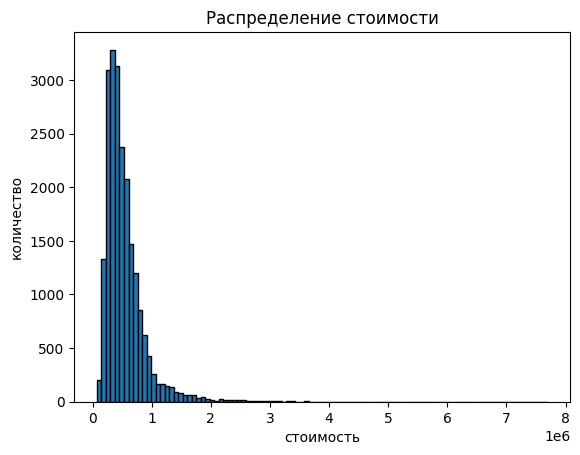

In [32]:
import matplotlib.pyplot as plt

plt.hist(df['price'], edgecolor = 'black', bins = 100)
plt.title('Распределение стоимости')
plt.xlabel('стоимость')
plt.ylabel('количество');

**Вывод** : наибольшее количество домов имеют стоимость до 1000000

### 1.3. Изучите распределение квадратуры жилой площади

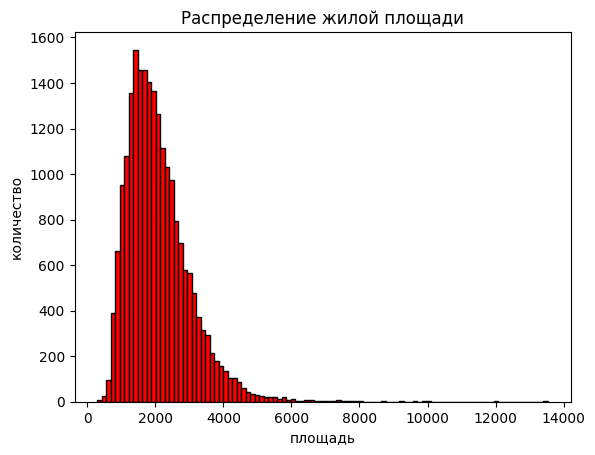

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(df['sqft_living'], edgecolor = 'black', color = 'red', bins = 100)
plt.title('Распределение жилой площади')
plt.xlabel('площадь')
plt.ylabel('количество');

### 1.4. Изучите распределение года постройки

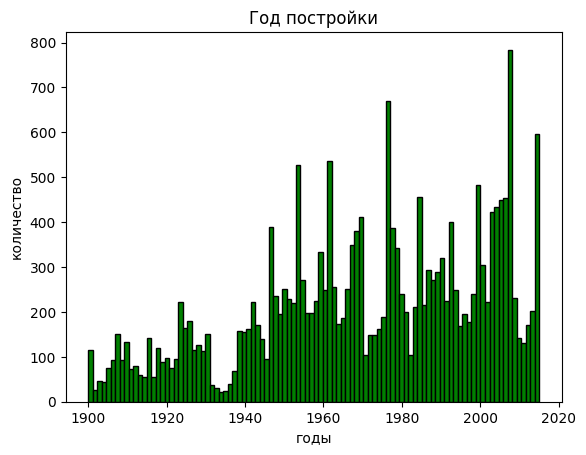

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(df['yr_built'], edgecolor = 'black', color = 'green', bins = 100)
plt.title('Год постройки')
plt.xlabel('годы')
plt.ylabel('количество');

## Задача 2


### 2.1. Изучите распределение домов от наличия вида на набережную Постройте график Сделайте выводы

In [35]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

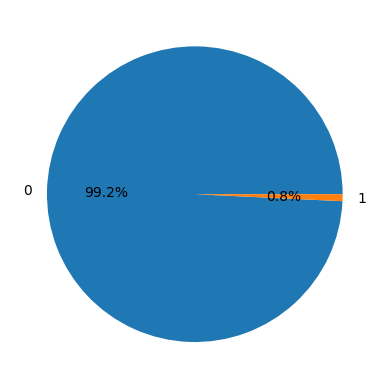

In [36]:
names = data.index
values = data.values
plt.pie(values, labels = names, autopct = '%.1f%%');

**Вывод** :только 0,8% домов имеют вид на набережную

### 2.2. Изучите распределение этажей домов

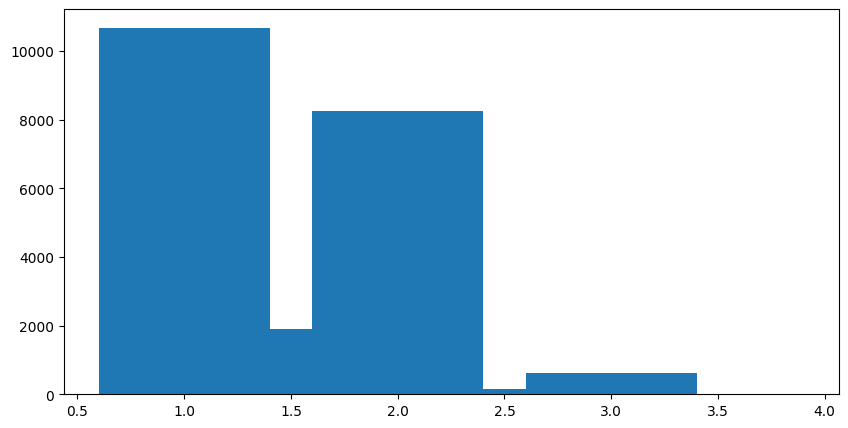

In [50]:
data = df['floors'].value_counts()
names = data.index
values = data.values
plt.figure(figsize = (10,5))
plt.bar(names,values);


**Вывод** : больше всего одноэтажных домов

### 2.3. Изучите распределение состояния домов

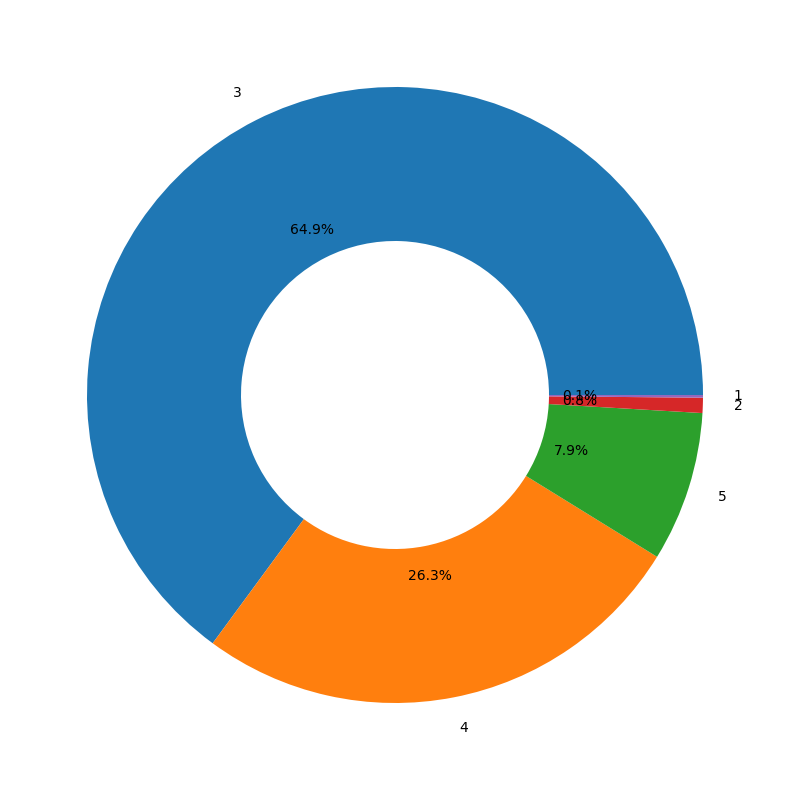

In [38]:
data = df['condition'].value_counts()
plt.figure(figsize = (10,10))
names = data.index
values = data.values
plt.pie(values, labels = names, autopct = '%.1f%%', wedgeprops = dict(width =0.5));

**Вывод** : наибольшая часть домов в состоянии 3, наименьшая- в состоянии 1

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

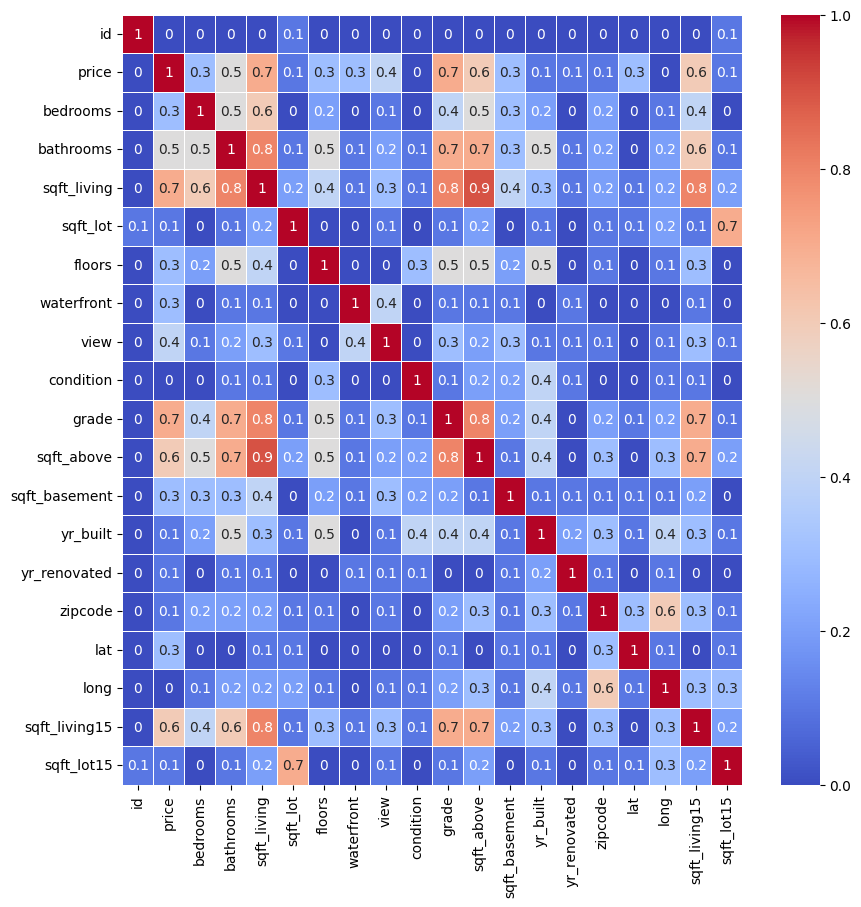

In [41]:
import seaborn as sns
corr_matrix = np.abs(df.corr(numeric_only=True))
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

По матрице корреляций мы видим, что цена в большей мере зависит от жилой площади, оценки grade, площади дома без учета подвала, и  жилой площади 15 соседних домов. Низкая корреляция  цены с долготой, с общей  площадь, и с состоянием дома.

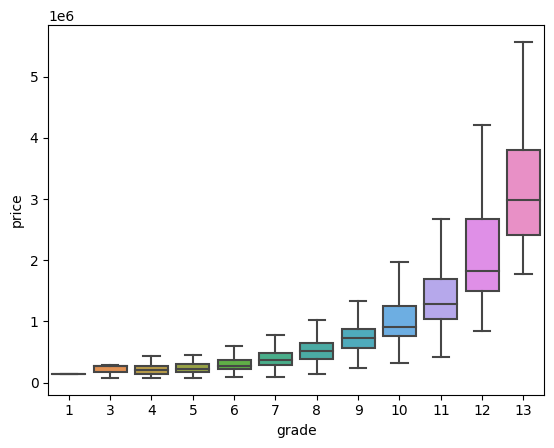

In [40]:


sns.boxplot(x=df['grade'], y=df['price'], showfliers = False);


**Вывод1**  Чем выше оценка конструкции здания и дизайна, тем выше цена, зависимость не линейная, чем выше grade, тем больше разброс  цены по grade, при этом, отличие стоимости домов с оценкой 1-6 выражено значительно меньше,  чем различие между оценками 10-13. Дома с оценкой до 8 стоят  до 1 000 000.

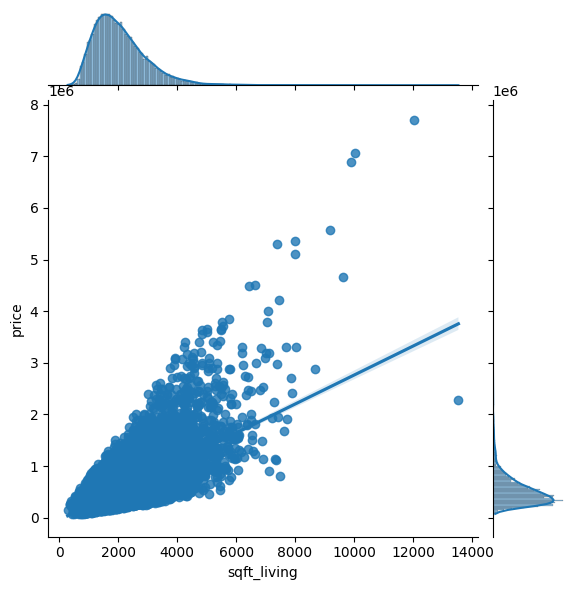

In [43]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

**Вывод2**  Чем больше жилая площадь  дома, тем выше цена, причем основной объем предложений при цене до 3000000 и площади до 60000

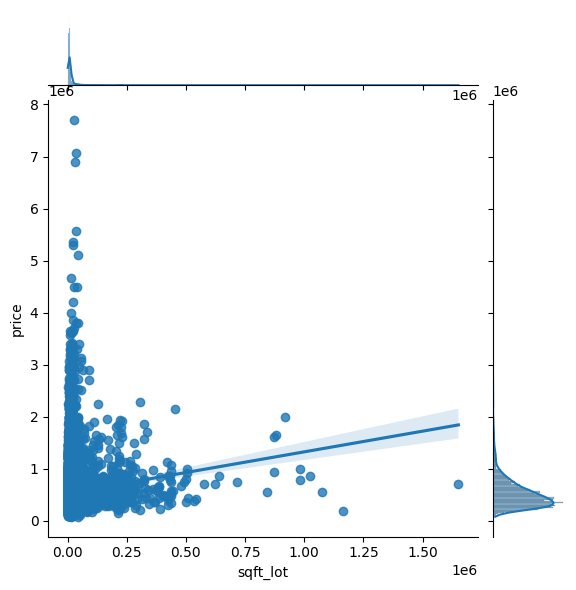

In [45]:
sns.jointplot(x=df['sqft_lot'], y=df['price'], kind='reg');

**Вывод3**  Между общей площадью и ценой нельзя увидеть явной зависимости

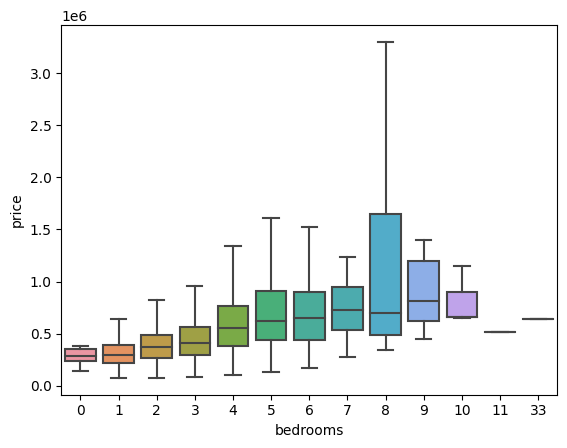

In [46]:
sns.boxplot(x=df['bedrooms'], y=df['price'], showfliers = False);

**Вывод4**  Между количеством спален и ценой есть прямая зависимость, но она не ярко выражена, например, можно найти дома с  количеством спален от 0 до 4 по схожей цене,  наибольший разброс цен на дома с 8 спальнями

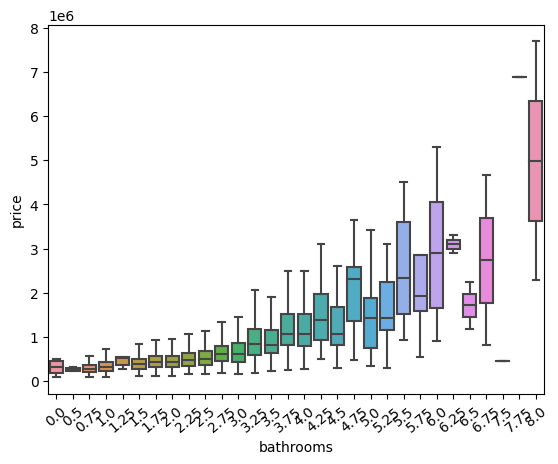

In [48]:
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers = False);
plt.xticks(rotation = 40);

**Вывод4**  Между количеством ванных комнат и ценой также наблюдаем зависимость , можно найти дома с тремя ванными по цене в пределах 1000000, медианное значение цены  дома с 8 ванными -5000000